In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn

def format_pytorch_version(version):
    return version.split('+')[0]

def format_cuda_version(version):
    return 'cu' + version.replace('.', '')

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)
CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 39.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 8.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 5.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.4/868.4 KB 3.3 M

In [2]:
!pip install pyunlocbox

from torch_geometric.utils import to_dense_adj
from scipy import spatial
from sklearn import metrics
# import pygsp
import utils
import learn_graph as lg
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 1.3 MB/s eta 0:00:00


In [3]:
class GCN_(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super().__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 64)
        self.conv3 = GCNConv(64, num_classes)

    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv3(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)

In [4]:
edge_index_chameleon = torch.load('edge_index_chameleon.pt')
adj_chameleon = to_dense_adj(edge_index_chameleon)
n = adj_chameleon.shape[1]
print(adj_chameleon.shape)
adj_chameleon = adj_chameleon.detach().numpy().reshape(n,-1)
print(adj_chameleon.shape)
# print(adj_chameleon)
G_gt_chameleon = nx.from_numpy_array(adj_chameleon)
pos = nx.spring_layout(G_gt_chameleon)

torch.Size([1, 2277, 2277])
(2277, 2277)


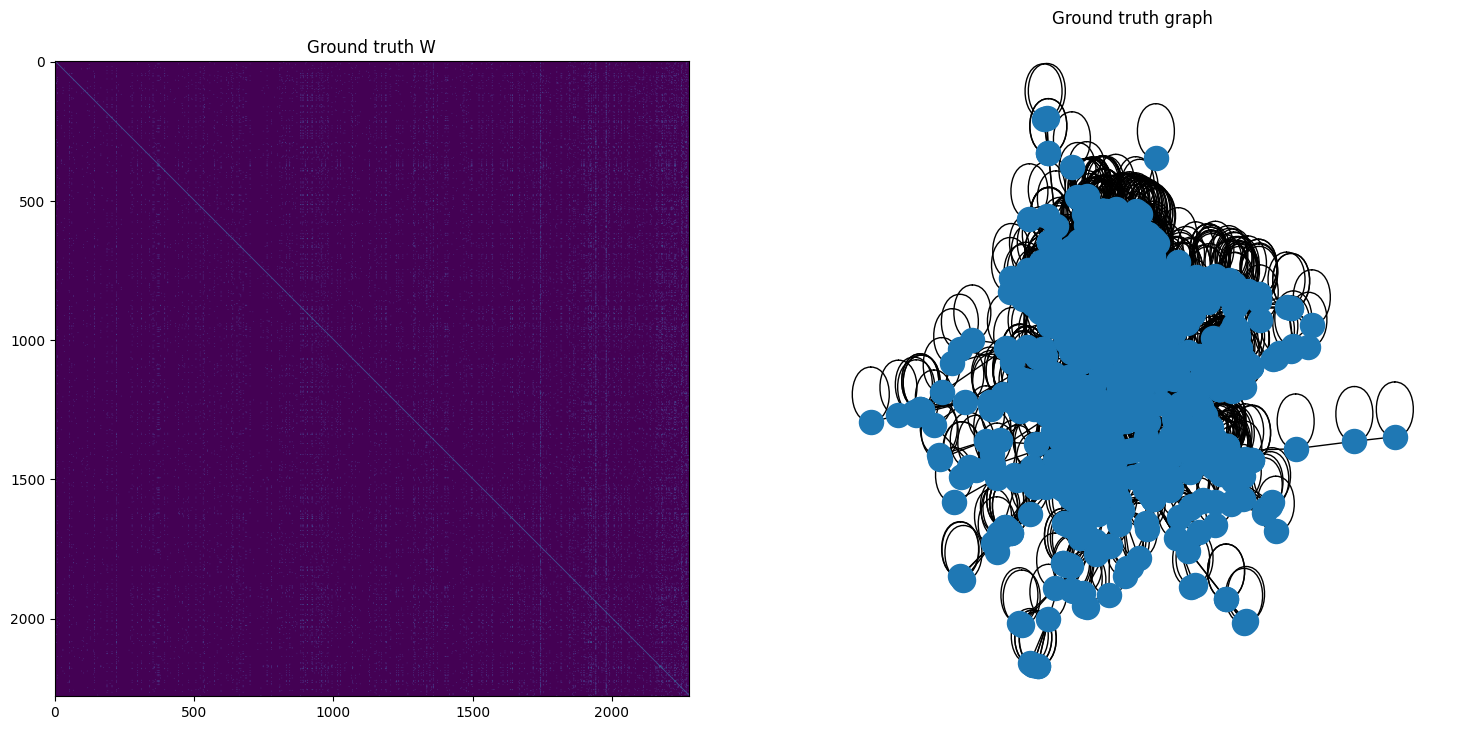

In [5]:
plt.figure(figsize=(18, 9))

plt.subplot(1,2,1)
plt.imshow(adj_chameleon)
plt.title("Ground truth W")

plt.subplot(1,2,2)
plt.title("Ground truth graph")
nx.draw(G_gt_chameleon, pos=pos)

In [6]:
edge_index_cornell = torch.load('edge_index_cornell.pt')
adj_cornell = to_dense_adj(edge_index_cornell)
n = adj_cornell.shape[1]
adj_cornell = adj_cornell.detach().numpy().reshape(n,-1)
print(adj_cornell.shape)
G_gt_cornell = nx.from_numpy_array(adj_cornell)
pos = nx.spring_layout(G_gt_cornell)

(183, 183)


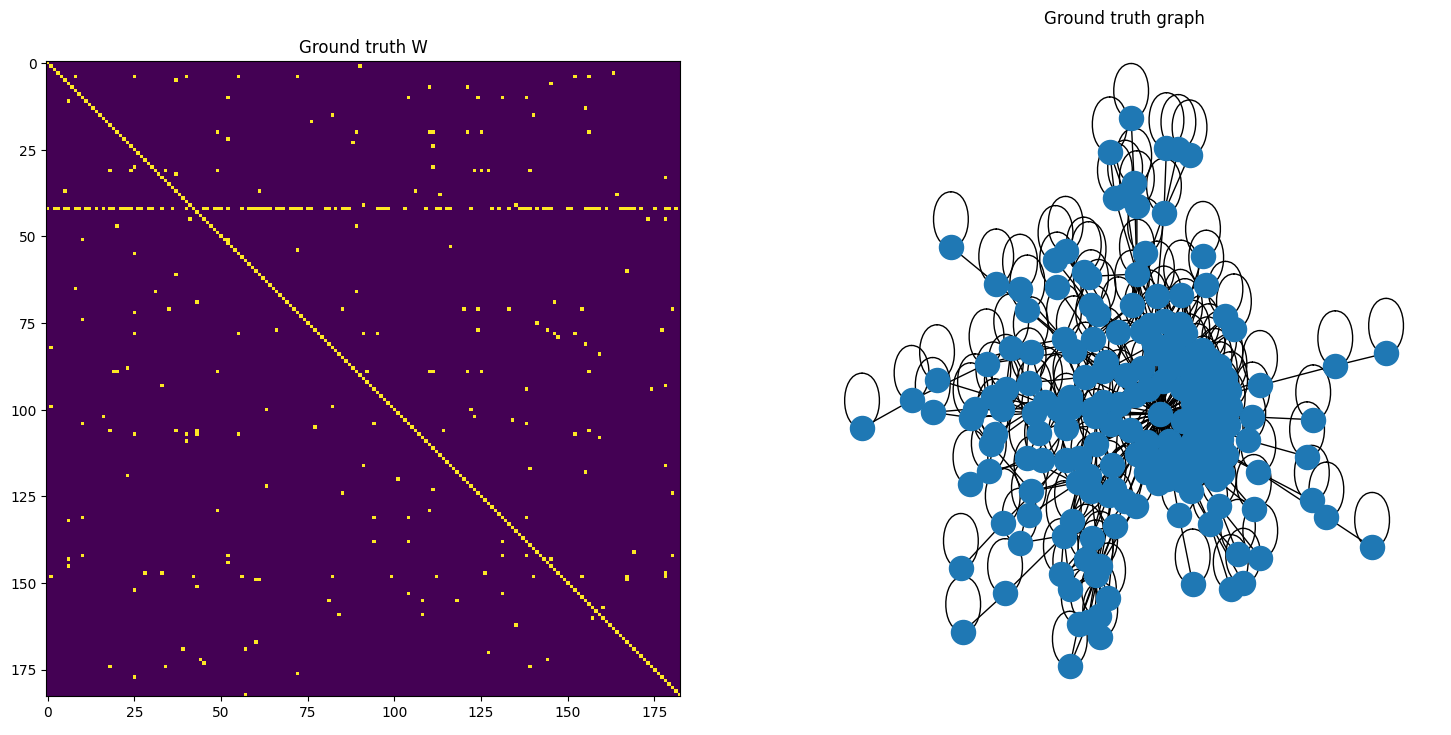

In [7]:
plt.figure(figsize=(18, 9))

plt.subplot(1,2,1)
plt.imshow(adj_cornell)
plt.title("Ground truth W")

plt.subplot(1,2,2)
plt.title("Ground truth graph")
nx.draw(G_gt_cornell, pos=pos)

In [8]:
edge_index_texas = torch.load('edge_index_texas.pt')
adj_texas = to_dense_adj(edge_index_texas)
n = adj_texas.shape[1]
adj_texas = adj_texas.detach().numpy().reshape(n,-1)
print(adj_texas.shape)
G_gt_texas = nx.from_numpy_array(adj_texas)
pos = nx.spring_layout(G_gt_texas)

(183, 183)


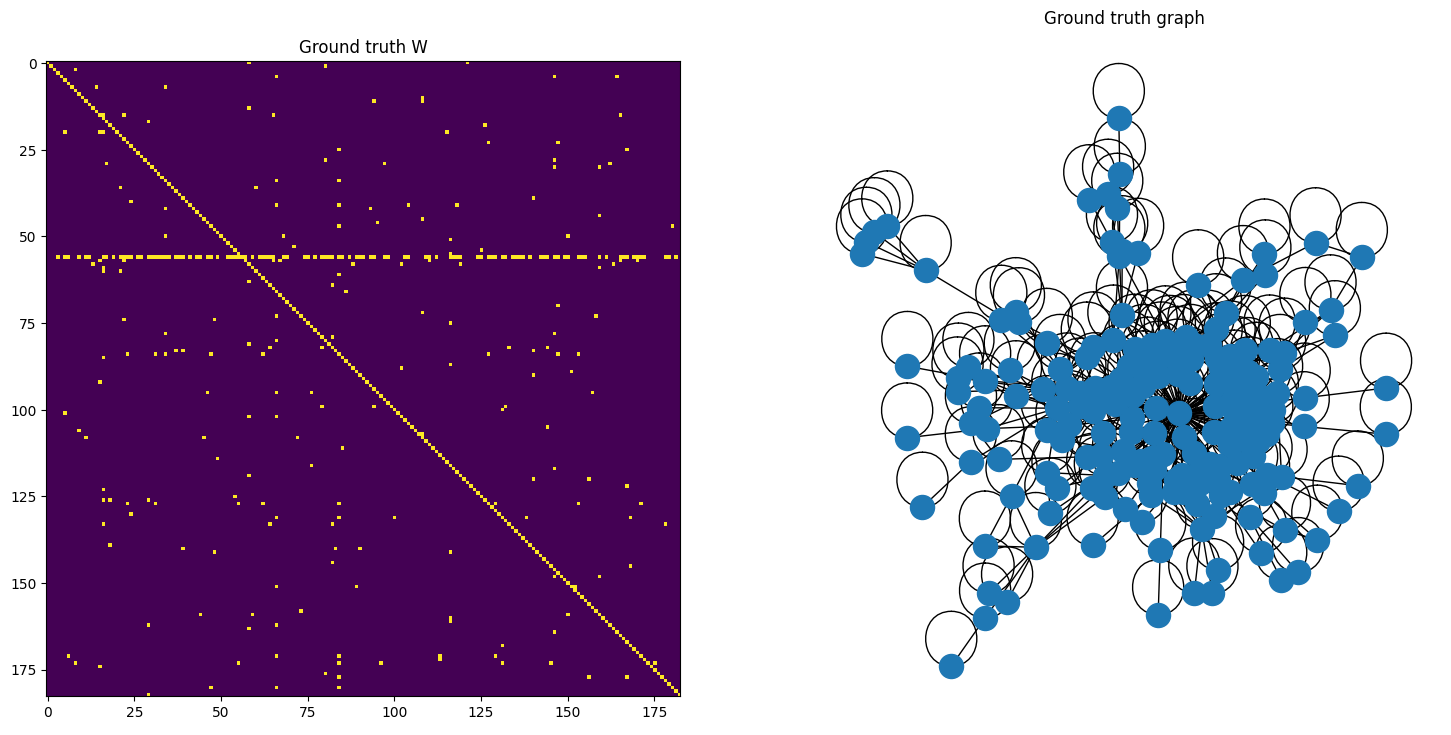

In [9]:
plt.figure(figsize=(18, 9))

plt.subplot(1,2,1)
plt.imshow(adj_texas)
plt.title("Ground truth W")

plt.subplot(1,2,2)
plt.title("Ground truth graph")
nx.draw(G_gt_texas, pos=pos)

In [10]:
label_chameleon = torch.load('label_chameleon.pt')
print(label_chameleon.shape)
print(label_chameleon)
print(label_chameleon.argmax(0))
print(label_chameleon[3])

(2277,)
[0 3 3 ... 0 4 0]
3
4


In [11]:
label_cornell = torch.load('label_cornell.pt')
print(label_cornell.shape)
print(label_cornell)

(183,)
[3 0 2 3 4 3 0 0 3 0 3 3 3 3 3 4 3 3 0 3 0 3 3 3 3 1 3 3 0 2 3 3 4 3 4 4 2
 3 3 3 0 4 0 3 3 3 2 2 0 3 0 3 3 3 3 3 0 2 2 4 4 4 3 3 3 3 0 3 3 3 4 3 3 4
 4 3 0 3 0 3 4 3 2 4 2 4 3 3 0 3 3 3 0 3 3 4 3 3 3 4 0 0 4 3 3 0 4 3 2 3 3
 0 3 0 0 3 3 4 3 3 3 0 3 0 3 2 4 2 3 3 0 4 3 4 3 4 3 3 0 3 2 3 3 3 3 3 3 2
 3 4 3 4 3 3 3 3 0 2 0 2 3 3 4 3 0 3 3 2 0 3 3 4 3 2 0 3 0 4 3 3 4 3 3]


In [12]:
label_texas = torch.load('label_texas.pt')
print(label_texas.shape)
print(label_texas)

(183,)
[3 0 2 3 4 3 0 0 3 0 3 3 3 3 3 4 3 3 0 3 0 3 3 3 3 1 3 3 0 2 3 3 4 3 4 4 2
 3 3 3 0 4 0 3 3 3 2 2 0 3 0 3 3 3 3 3 0 2 2 4 4 4 3 3 3 3 0 3 3 3 4 3 3 4
 4 3 0 3 0 3 4 3 2 4 2 4 3 3 0 3 3 3 0 3 3 4 3 3 3 4 0 0 4 3 3 0 4 3 2 3 3
 0 3 0 0 3 3 4 3 3 3 0 3 0 3 2 4 2 3 3 0 4 3 4 3 4 3 3 0 3 2 3 3 3 3 3 3 2
 3 4 3 4 3 3 3 3 0 2 0 2 3 3 4 3 0 3 3 2 0 3 3 4 3 2 0 3 0 4 3 3 4 3 3]


In [13]:
node_feat_cameleon = torch.load('node_feat_cameleon.pt')
print(node_feat_cameleon.shape)
print(node_feat_cameleon)

torch.Size([2277, 2325])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0238, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


In [14]:
node_feat_cornell = torch.load('node_feat_cornell.pt')
print(node_feat_cornell.shape)
print(node_feat_cornell)

torch.Size([183, 1703])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [15]:
node_feat_texas = torch.load('node_feat_texas.pt')
print(node_feat_texas.shape)
print(node_feat_texas)

torch.Size([183, 1703])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


## Solve the optimization problem

In [16]:
W_chameleon, problem = lg.log_degree_barrier(node_feat_cameleon, dist_type='sqeuclidean', alpha=1, beta=6, retall=True, verbosity='LOW')

Solution found after 439 iterations:
    objective function f(sol) = -1.245418e+03
    stopping criterion: RTOL


In [17]:
W_thresh_chameleon = np.max(adj_chameleon) * W_chameleon / np.max(W_chameleon)
W_thresh_chameleon[W_thresh_chameleon < np.min(adj_chameleon)] = 0

G_learned_chameleon = nx.from_numpy_array(W_thresh_chameleon)
print(G_learned_chameleon.number_of_edges())
print(G_learned_chameleon.number_of_nodes())
pos = nx.spring_layout(G_gt_chameleon)

1776702
2277


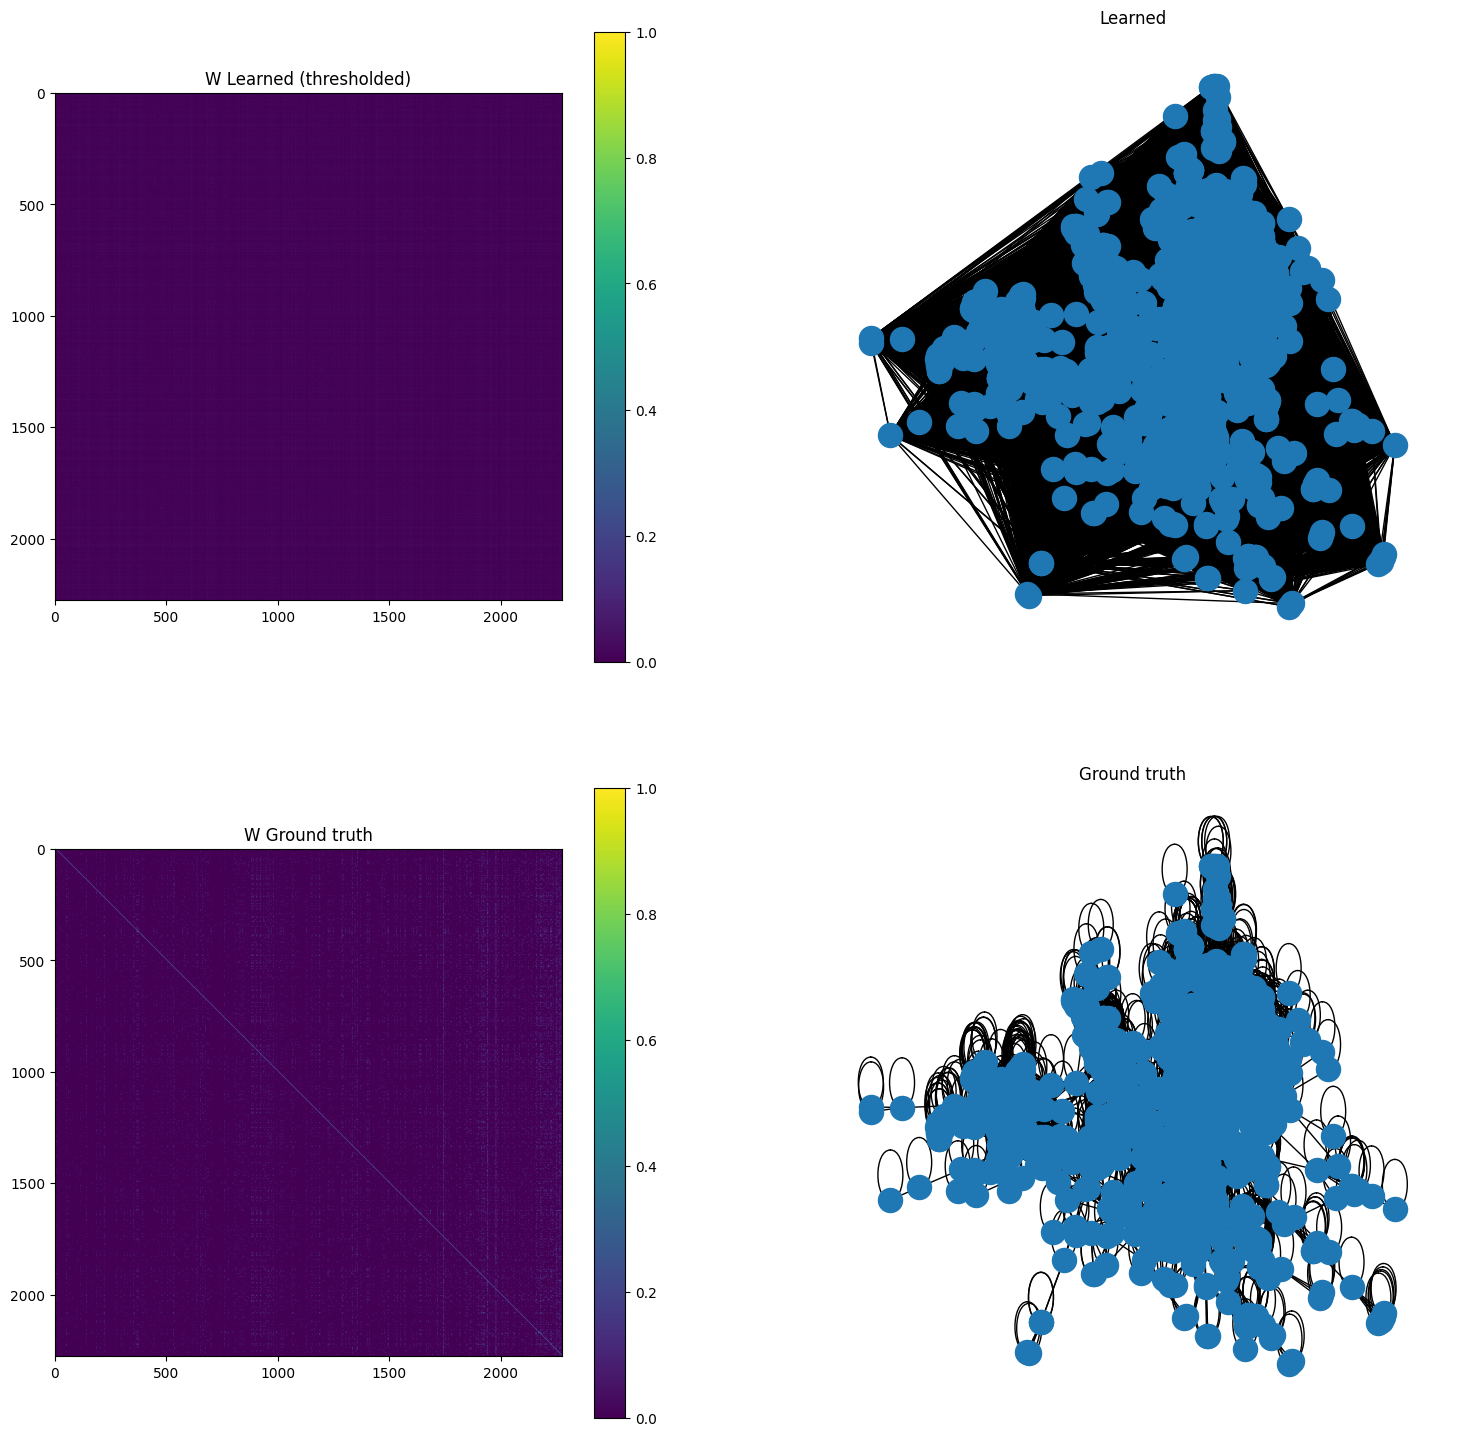

In [18]:
plt.figure(figsize=(18, 18))
plt.subplot(2,2,1)
plt.imshow(W_thresh_chameleon)
plt.colorbar()
plt.title('W Learned (thresholded)')

plt.subplot(2,2,2)
nx.draw(G_learned_chameleon, pos=pos)
plt.title('Learned')

plt.subplot(2,2,3)
plt.imshow(adj_chameleon)
plt.colorbar()
plt.title('W Ground truth')

plt.subplot(2,2,4)
nx.draw(G_gt_chameleon, pos=pos)
plt.title('Ground truth')

plt.show()

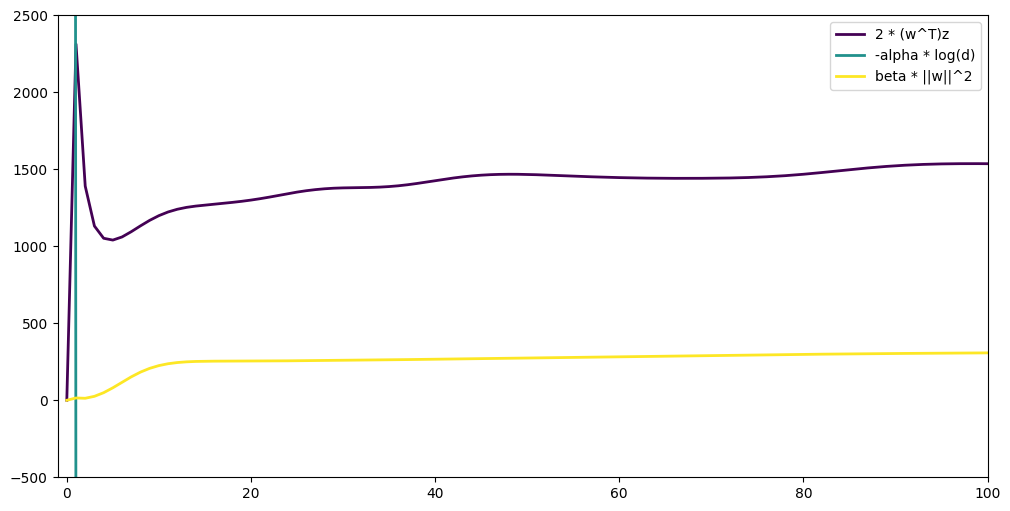

In [19]:
# Display objective values
fig, ax = utils.plot_objectives(problem['objective'], 
                                labels=['2 * (w^T)z', 
                                        '-alpha * log(d)',
                                        'beta * ||w||^2'])
ax.set_xlim([-1, 100])
ax.set_ylim([-500, 2500])
plt.show()

In [20]:
W_cornell, cornell = lg.log_degree_barrier(node_feat_cornell, dist_type='sqeuclidean', alpha=1, beta=1, retall=True, verbosity='LOW')


Solution found after 42 iterations:
    objective function f(sol) = -3.367436e+02
    stopping criterion: RTOL


In [21]:
W_thresh_cornell = np.max(adj_cornell) * W_cornell / np.max(W_cornell)
W_thresh_cornell[W_thresh_cornell < np.min(adj_cornell)] = 0

G_learned_cornell = nx.from_numpy_array(W_thresh_cornell)
pos = nx.spring_layout(G_gt_cornell)

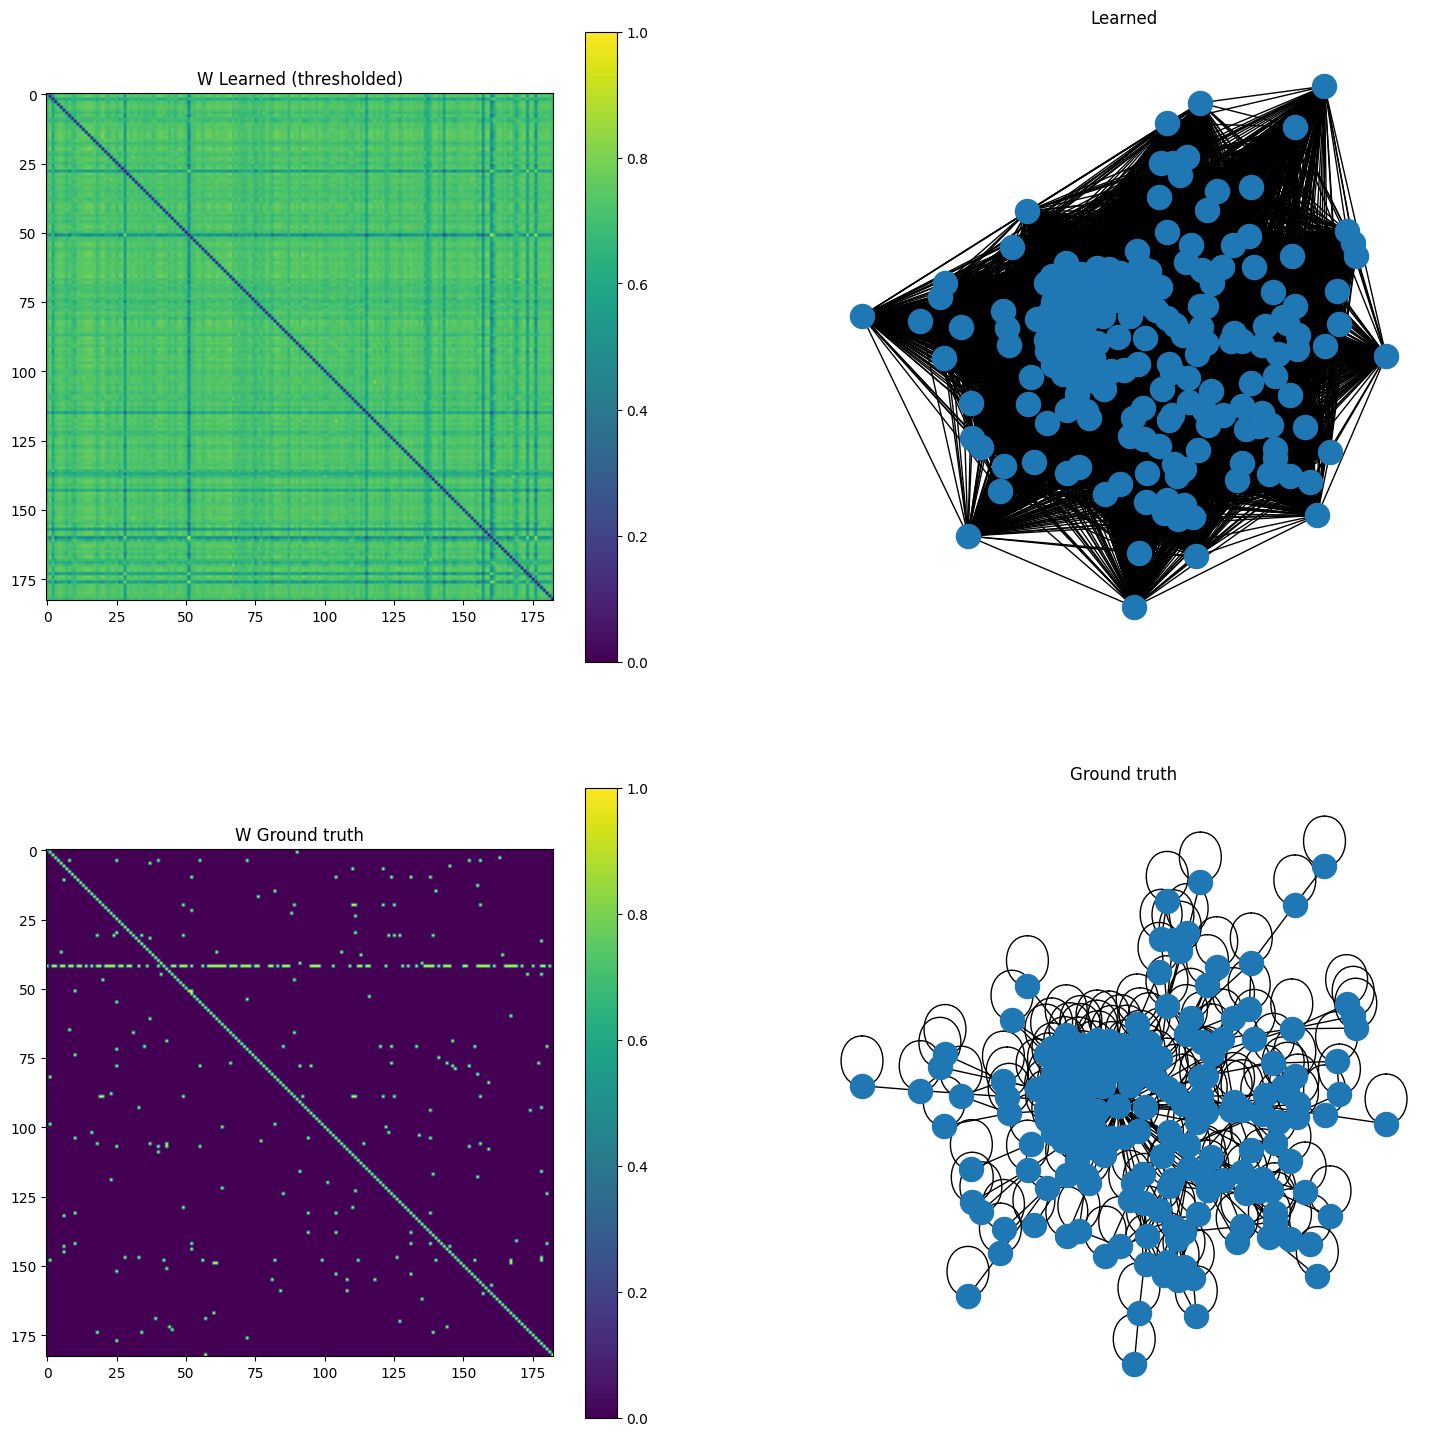

In [22]:
plt.figure(figsize=(18, 18))
plt.subplot(2,2,1)
plt.imshow(W_thresh_cornell)
plt.colorbar()
plt.title('W Learned (thresholded)')

plt.subplot(2,2,2)
nx.draw(G_learned_cornell, pos=pos)
plt.title('Learned')

plt.subplot(2,2,3)
plt.imshow(adj_cornell)
plt.colorbar()
plt.title('W Ground truth')

plt.subplot(2,2,4)
nx.draw(G_gt_cornell, pos=pos)
plt.title('Ground truth')

plt.show()

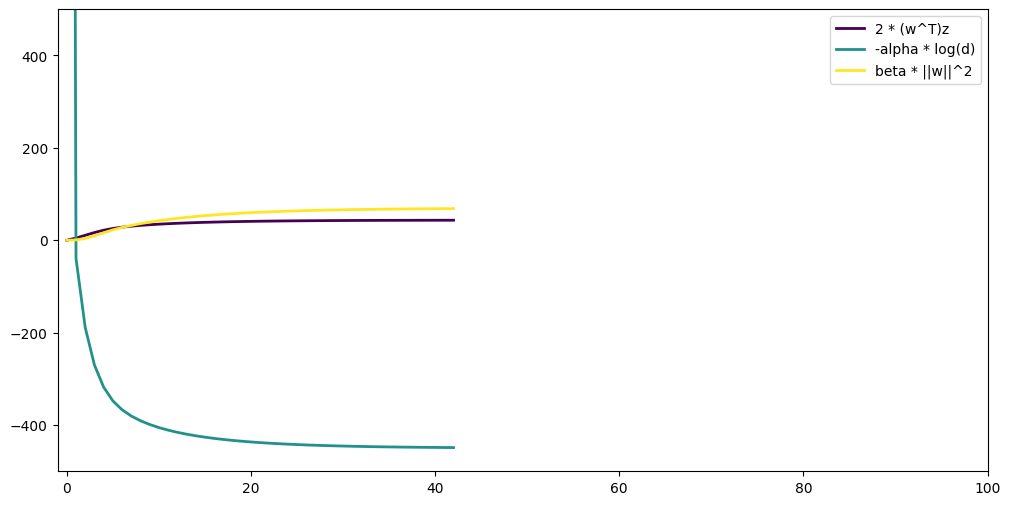

In [23]:
# Display objective values
fig, ax = utils.plot_objectives(cornell['objective'], 
                                labels=['2 * (w^T)z', 
                                        '-alpha * log(d)',
                                        'beta * ||w||^2'])
ax.set_xlim([-1, 100])
ax.set_ylim([-500, 500])
plt.show()

In [24]:
W_texas, texas = lg.log_degree_barrier(node_feat_texas, dist_type='sqeuclidean', alpha=1, beta=1, retall=True, verbosity='LOW')

Solution found after 42 iterations:
    objective function f(sol) = -3.367436e+02
    stopping criterion: RTOL


In [25]:
W_thresh_texas = np.max(adj_texas) * W_texas / np.max(W_texas)
W_thresh_texas[W_thresh_texas < np.min(adj_texas)] = 0

G_learned_texas = nx.from_numpy_array(W_thresh_texas)
pos = nx.spring_layout(G_gt_texas)

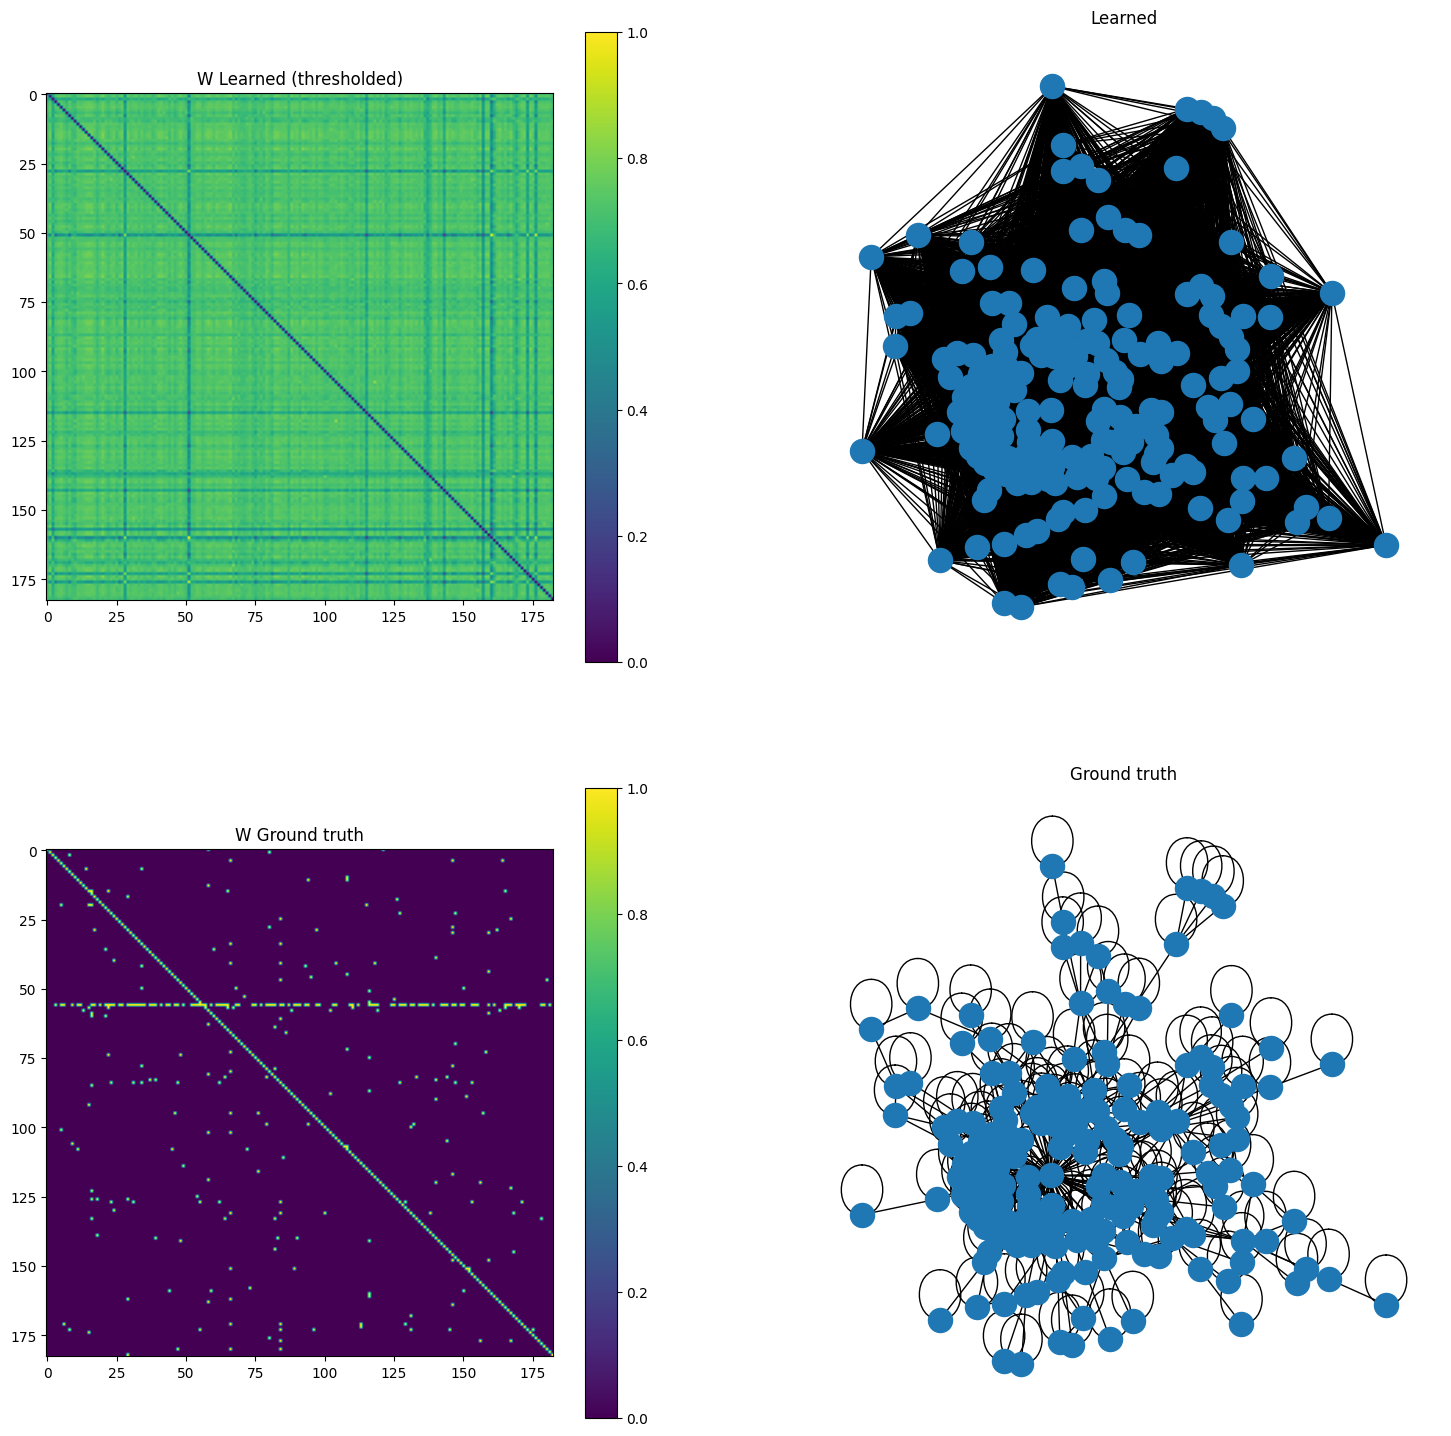

In [26]:
plt.figure(figsize=(18, 18))
plt.subplot(2,2,1)
plt.imshow(W_thresh_texas)
plt.colorbar()
plt.title('W Learned (thresholded)')

plt.subplot(2,2,2)
nx.draw(G_learned_texas, pos=pos)
plt.title('Learned')

plt.subplot(2,2,3)
plt.imshow(adj_texas)
plt.colorbar()
plt.title('W Ground truth')

plt.subplot(2,2,4)
nx.draw(G_gt_texas, pos=pos)
plt.title('Ground truth')

plt.show()

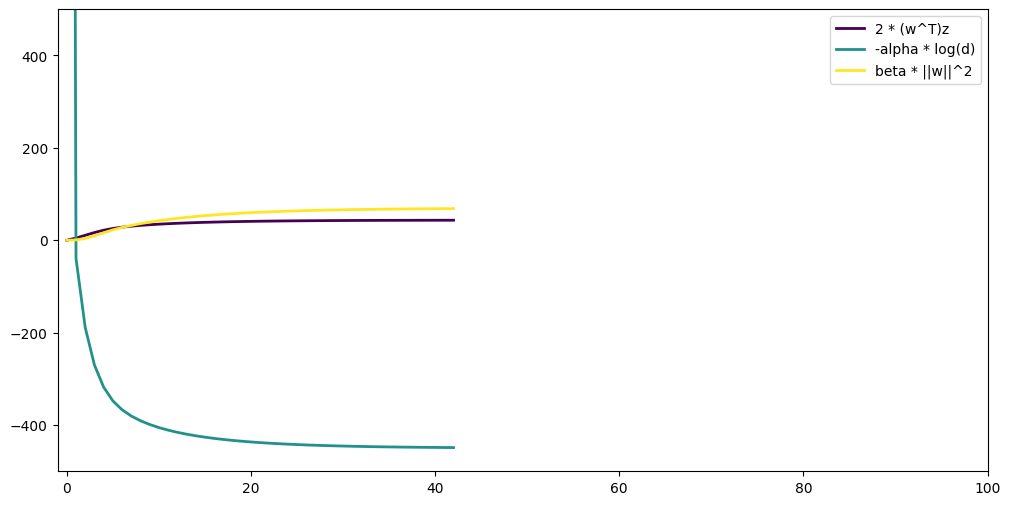

In [27]:
# Display objective values
fig, ax = utils.plot_objectives(texas['objective'], 
                                labels=['2 * (w^T)z', 
                                        '-alpha * log(d)',
                                        'beta * ||w||^2'])
ax.set_xlim([-1, 100])
ax.set_ylim([-500, 500])
plt.show()

In [28]:
# edge_list = nx.generate_edgelist(G_learned_texas, data=["weight"])
# print(list(edge_list))

def prepare_data(node_feat, G_learned, labels):
  N = G_learned.number_of_nodes()
  M = G_learned.number_of_edges()

  src = []
  dst = [] 
  edgeattr = []
  edge_list = list(nx.generate_edgelist(G_learned, data=["weight"]))
  for i in range(M):
    edge = list(map(float, edge_list[i].split(" ")))
    src.append(edge[0])
    dst.append(edge[1])
    edgeattr.append(edge[2])

    if edge[0] != edge[1]:
      src.append(edge[1])
      dst.append(edge[0])
      edgeattr.append(edge[2])      

  edgeindex = torch.tensor([src, dst], dtype=torch.long)
  edgeattr = torch.tensor(edgeattr, dtype=torch.float)
  data = Data(x=node_feat, edge_index=edgeindex, edge_attr=edgeattr, y=labels)
  return data

data_chameleon = prepare_data(node_feat_cameleon, G_learned_chameleon, label_chameleon)
print(data_chameleon.is_directed()) 
print(data_chameleon.num_nodes)
print(data_chameleon.num_node_features)
print(data_chameleon.num_edges)


<ipython-input-28-da6edec2f462>:23: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  edgeindex = torch.tensor([src, dst], dtype=torch.long)


False
2277
2325
3553404


In [42]:
from torch_geometric.sampler.neighbor_sampler import torch_geometric
def val(model,data):
    # data = data.pin_memory()
    # data = data.to('cuda:0', non_blocking=True)
    model.eval()
    pred = model(data.x, data.edge_index,data.edge_attr).argmax(dim=1)
    correct = sum(1 for a, b in zip(data.y[data.val_mask], pred[data.val_mask]) if a == b)
    # correct = [pred[data.val_mask] == data.y[data.val_mask]].sum()
    acc = int(correct) / int(data.val_mask.sum())
    # print(data.val_mask.sum())
    return acc

def split(data, num_classes,split_percent):
    indices = []
    num_test = (int)(data.num_nodes * split_percent / num_classes)
    for i in range(num_classes):
        index = torch.tensor((data.y == i).nonzero()).reshape(-1)
        index = index[torch.randperm(index.size(0))]
        indices.append(index)
    
    test_index = torch.cat([i[:num_test] for i in indices], dim=0)
    val_index = torch.cat([i[num_test:int(num_test*1.5)] for i in indices], dim=0)
    train_index = torch.cat([i[int(num_test*1.5):] for i in indices], dim=0)
    data.train_mask = torch_geometric.utils.index_to_mask(train_index, size=data.num_nodes)
    data.val_mask = torch_geometric.utils.index_to_mask(val_index, size=data.num_nodes)
    data.test_mask = torch_geometric.utils.index_to_mask(test_index, size=data.num_nodes)
    return data

In [43]:
def train_on_original_dataset(data, num_classes, feature_size, hidden_units, learning_rate, decay, epochs):
  model = GCN_(feature_size, hidden_units, num_classes)
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=decay)
  test_split_percent = 0.2
  data = split(data,num_classes,test_split_percent)
  if data.edge_attr == None:
    edge_weight = torch.ones(data.edge_index.size(1))
    data.edge_attr = edge_weight
    
  for epoch in range(epochs):
    # print(epoch)
    model.zero_grad()
    out = model(data.x, data.edge_index,data.edge_attr.float())
    pred = out.argmax(1)
    criterion = torch.nn.NLLLoss()
    # print(type(out[data.train_mask]))
    # print(type(data.y[data.train_mask]))
    loss = criterion(out[data.train_mask], torch.from_numpy(data.y[data.train_mask]).long()) 
    loss.backward()
    optimizer.step()
    best_val_acc = 0
    
    val_acc = val(model,data)
    if best_val_acc < val_acc:
        torch.save(model, 'full_best_model.pt')
        best_val_acc = val_acc
  
    if epoch % 20 == 0:
        print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f})'.format(epoch, loss, val_acc, best_val_acc))

  model = torch.load('full_best_model.pt')
  model.eval()
  # data = data.pin_memory()
  # data = data.to('cuda:0', non_blocking=True)
  pred = model(data.x, data.edge_index,data.edge_attr).argmax(dim=1)
  correct = sum(1 for a, b in zip(data.y[data.test_mask], pred[data.test_mask]) if a == b)
  # correct = [pred[data.test_mask] == data.y[data.test_mask]]
  acc = int(correct) / int(data.test_mask.sum())
  print(data.test_mask.sum())
  
  print('--------------------------')
  print('Accuracy on test data {:.3f}'.format(acc*100))

In [33]:
train_on_original_dataset(data_chameleon, 5, 2325, 128, 0.1, 1e-3, 400)

In epoch 0, loss: 1.610, val acc: 0.427 (best 0.427)
In epoch 20, loss: 1.463, val acc: 0.587 (best 0.587)
In epoch 40, loss: 1.406, val acc: 0.604 (best 0.604)
In epoch 60, loss: 1.364, val acc: 0.667 (best 0.667)
In epoch 80, loss: 1.327, val acc: 0.822 (best 0.822)
In epoch 100, loss: 1.300, val acc: 0.849 (best 0.849)
In epoch 120, loss: 1.284, val acc: 0.822 (best 0.822)
In epoch 140, loss: 1.272, val acc: 0.818 (best 0.818)
In epoch 160, loss: 1.262, val acc: 0.822 (best 0.822)
In epoch 180, loss: 1.258, val acc: 0.831 (best 0.831)
In epoch 200, loss: 1.251, val acc: 0.831 (best 0.831)
In epoch 220, loss: 1.248, val acc: 0.822 (best 0.822)
In epoch 240, loss: 1.244, val acc: 0.844 (best 0.844)
In epoch 260, loss: 1.245, val acc: 0.813 (best 0.813)
In epoch 280, loss: 1.241, val acc: 0.831 (best 0.831)
In epoch 300, loss: 1.239, val acc: 0.840 (best 0.840)
In epoch 320, loss: 1.239, val acc: 0.827 (best 0.827)
In epoch 340, loss: 1.236, val acc: 0.831 (best 0.831)
In epoch 360, lo

In [41]:
data_chameleon_original = prepare_data(node_feat_cameleon, G_gt_chameleon, label_chameleon)
train_on_original_dataset(data_chameleon_original, 5, 2325, 128, 0.01, 1e-3, 400)

<ipython-input-28-da6edec2f462>:23: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  edgeindex = torch.tensor([src, dst], dtype=torch.long)


In epoch 0, loss: 1.609, val acc: 0.200 (best 0.200)
In epoch 20, loss: 1.375, val acc: 0.378 (best 0.378)
In epoch 40, loss: 1.237, val acc: 0.387 (best 0.387)
In epoch 60, loss: 1.179, val acc: 0.444 (best 0.444)
In epoch 80, loss: 1.134, val acc: 0.480 (best 0.480)
In epoch 100, loss: 1.097, val acc: 0.480 (best 0.480)
In epoch 120, loss: 1.087, val acc: 0.476 (best 0.476)
In epoch 140, loss: 1.051, val acc: 0.516 (best 0.516)
In epoch 160, loss: 1.039, val acc: 0.511 (best 0.511)
In epoch 180, loss: 1.029, val acc: 0.516 (best 0.516)
In epoch 200, loss: 1.030, val acc: 0.538 (best 0.538)
In epoch 220, loss: 1.003, val acc: 0.493 (best 0.493)
In epoch 240, loss: 1.001, val acc: 0.502 (best 0.502)
In epoch 260, loss: 0.988, val acc: 0.498 (best 0.498)
In epoch 280, loss: 0.978, val acc: 0.498 (best 0.498)
In epoch 300, loss: 0.971, val acc: 0.533 (best 0.533)
In epoch 320, loss: 0.973, val acc: 0.524 (best 0.524)
In epoch 340, loss: 0.966, val acc: 0.533 (best 0.533)
In epoch 360, lo